# Course End Project 1

# Importing the required laibraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# Personal configs
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

# Import data

In [4]:
train=pd.read_csv('./Dataset/train.csv')
test=pd.read_csv('./Dataset/test.csv')

# Figure out the primary key and look for the requirement of indexing

In [5]:
train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [6]:
test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [8]:
print(f'Train dataset shape {train.shape}')
print(f'Test dataset shape {test.shape}')

Train dataset shape (27321, 80)
Test dataset shape (11709, 80)


In [9]:
train.nunique().sort_values(ascending=False)

UID                       27161
lng                       27160
lat                       27158
ALand                     27131
male_age_sample_weight    27008
                          ...  
state_ab                     52
type                          6
SUMLEVEL                      1
primary                       1
BLOCKID                       0
Length: 80, dtype: int64

In [10]:
train.shape

(27321, 80)

- Since the UID features has the greatest unique values it has an unique values of **`27161`** but the number of data points of the train dataset is **`27321`**
- Lets check if there is duplicate data for same unique UID in our dataset if yes then the UID must be the primary key in our dataset

In [11]:
duplicate_row_id=train['UID'].duplicated()[train['UID'].duplicated()==True].index

In [12]:
duplicate_row_id.shape

(160,)

- Since the number of duplicated row in our dataset is 160 which in equal to, `27321` the number of datapoints in our dataset minus `27161` which is number of unique values of the UID.
- Therefore UID is the primary key

# Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [13]:
rcParams = {'xtick.labelsize':'15','ytick.labelsize':'15','axes.labelsize':'16','figure.figsize':(20,20),'figure.titlesize':'18'}

In [14]:
def error_ploter(data):
    """
    This function plot null value contain % for each features
    param:
        data - the dataset to which you want to plot the null value % for each features
    """
    null_percentage=data.isna().sum().sort_values(ascending=False)/data.shape[0]*100
    plt.figure(figsize=(10,10))
    plot=sns.barplot(x=null_percentage.values,y=null_percentage.index)
    plt.title('Null value percentage for individual features',size=18,fontweight='bold')
    plt.xlabel('Null value percentage',size=15)
    plt.ylabel('Features name',size=15)

    for rec in plot.patches:
        val=rec.get_width()
        height=rec.get_height()
        y=rec.get_y()
        plot.text(val+1,y+1,f'{round(val,2)} %')
    plt.show() 
    return null_percentage

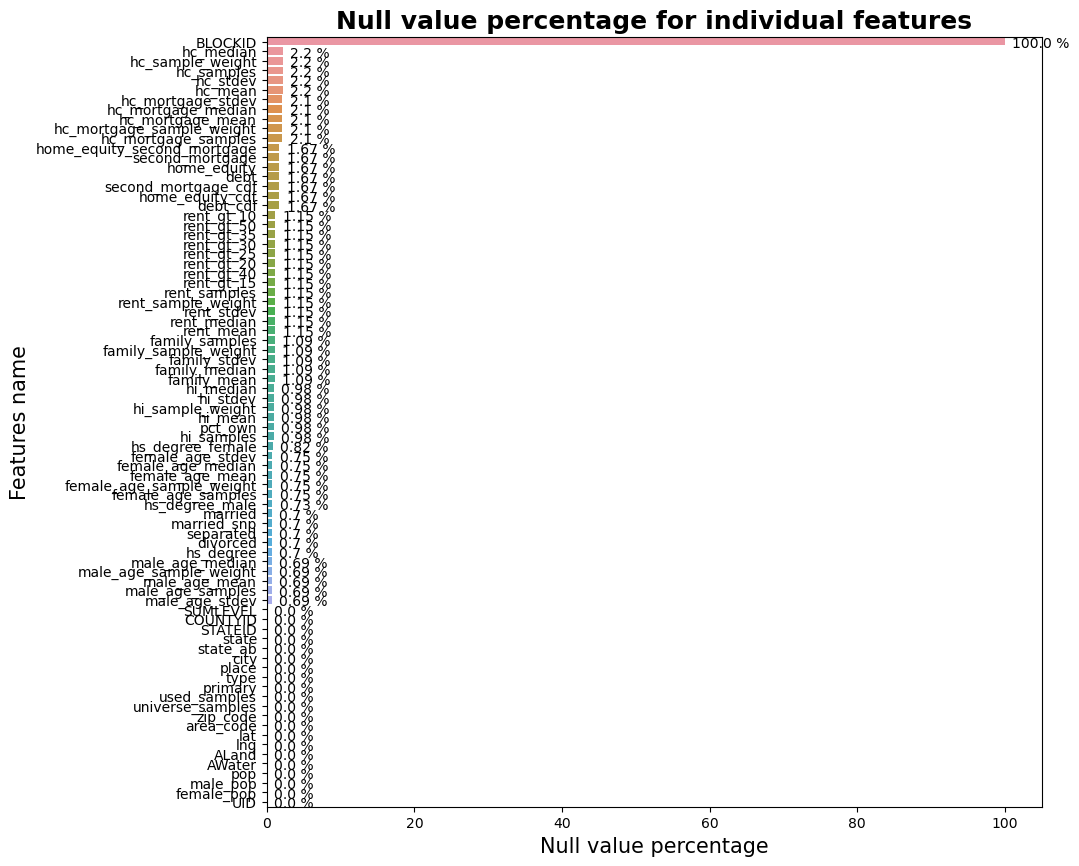

In [15]:
err1=error_ploter(train)

In [16]:
err1.head(10)

BLOCKID                      100.000000
hc_median                      2.196113
hc_sample_weight               2.196113
hc_samples                     2.196113
hc_stdev                       2.196113
hc_mean                        2.196113
hc_mortgage_stdev              2.097288
hc_mortgage_median             2.097288
hc_mortgage_mean               2.097288
hc_mortgage_sample_weight      2.097288
dtype: float64

- Null value percentage for train dataset
- The BLOCKID contain 100% of null values. So we can remove this features
- Features with null value in range 2% - 2.5%: ['hc_median', 'hc_sample_weight', 'hc_samples', 'hc_stdev', 'hc_mean','hc_mortgage_stdev', 'hc_mortgage_median', 'hc_mortgage_mean','hc_mortgage_sample_weight', 'hc_mortgage_samples']
- Features with null values in range 1% - 2 %: ['home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt','second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'rent_gt_10','rent_gt_50', 'rent_gt_35', 'rent_gt_30', 'rent_gt_25', 'rent_gt_20','rent_gt_40', 'rent_gt_15', 'rent_samples', 'rent_sample_weight','rent_stdev', 'rent_median', 'rent_mean', 'family_samples','family_sample_weight', 'family_stdev', 'family_median', 'family_mean']
- Features with null values less that 1%: ['hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_mean', 'pct_own','hi_samples', 'hs_degree_female', 'female_age_stdev','female_age_median', 'female_age_mean', 'female_age_sample_weight','female_age_samples', 'hs_degree_male', 'married', 'married_snp','separated', 'divorced', 'hs_degree', 'male_age_median','male_age_sample_weight', 'male_age_mean', 'male_age_samples','male_age_stdev']

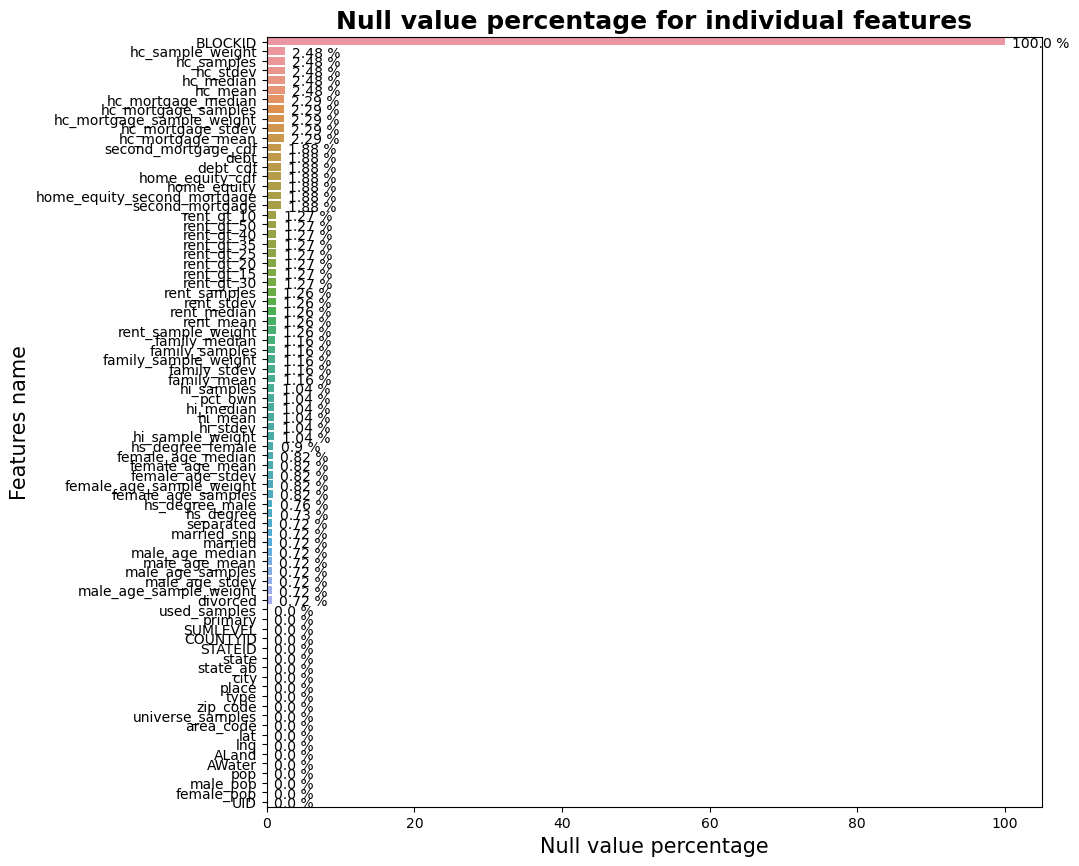

In [17]:
err2=error_ploter(test)

In [18]:
err2.head(10)

BLOCKID                      100.000000
hc_sample_weight               2.476727
hc_samples                     2.476727
hc_stdev                       2.476727
hc_median                      2.476727
hc_mean                        2.476727
hc_mortgage_median             2.288838
hc_mortgage_samples            2.288838
hc_mortgage_sample_weight      2.288838
hc_mortgage_stdev              2.288838
dtype: float64

- Null value percentage for train dataset
- The BLOCKID contain 100% of null values. So we can remove this features
- Features with null value in range 2% - 2.5%:['hc_sample_weight', 'hc_samples', 'hc_stdev', 'hc_median', 'hc_mean','hc_mortgage_median', 'hc_mortgage_samples','hc_mortgage_sample_weight', 'hc_mortgage_stdev', 'hc_mortgage_mean']
- Features with null values in range 1% - 2 %:['second_mortgage_cdf', 'debt', 'debt_cdf', 'home_equity_cdf','home_equity', 'home_equity_second_mortgage', 'second_mortgage','rent_gt_10', 'rent_gt_50', 'rent_gt_40', 'rent_gt_35', 'rent_gt_25','rent_gt_20', 'rent_gt_15', 'rent_gt_30', 'rent_samples', 'rent_stdev','rent_median', 'rent_mean', 'rent_sample_weight', 'family_median','family_samples', 'family_sample_weight', 'family_stdev', 'family_mean','hi_samples', 'pct_own', 'hi_median', 'hi_mean', 'hi_stdev','hi_sample_weight']
- Features with null values less that 1%: ['hs_degree_female', 'female_age_median', 'female_age_mean','female_age_stdev', 'female_age_sample_weight', 'female_age_samples','hs_degree_male', 'hs_degree', 'separated', 'married_snp', 'married','male_age_median', 'male_age_mean', 'male_age_samples','male_age_stdev', 'male_age_sample_weight', 'divorced']

- We can fix this null values with 1% to 2.5%
- Null values for features with less than 1% can safely remove

In [19]:
train['debt']

0        0.52963
1        0.60855
2        0.73484
3        0.52714
4        0.51938
          ...   
27316    0.11694
27317    0.65364
27318    0.58095
27319    0.65722
27320    0.65537
Name: debt, Length: 27321, dtype: float64

In [20]:
def imputer(data,err):
    max_err_index=err[err>=85].index
    null_index=err[err>0].index
    stds_=data[null_index].describe().loc['std'].dropna()
    std_less_50=stds_[stds_<50].index
    std_greater_50=stds_[stds_>=50].index
    
    data=data.drop(max_err_index,axis=1)
    
    for i in std_less_50:
        if(data[i].dtypes!='O'):
            data[i]=data[i].fillna(data[i].mean())
        else:
            data[i]=data[i].fillna(data[i].mode())
    for i in std_greater_50:
        if(data[i].dtypes!='O'):
            data[i]=data[i].fillna(data[i].median())
        else:
            data[i]=data[i].fillna(data[i].mode())
    return data

In [21]:
train1=imputer(train,err1).copy()

In [22]:
test1=imputer(test,err2).copy()

# Droping the BLOCKID columns

In [23]:
try:
    train.drop('BLOCKID',axis=1,inplace=True)
    test.drop('BLOCKID',axis=1,inplace=True)
except Exception:
    print('Already Remove this BLOCKID column')

In [24]:
train1=train.copy()
test1=test.copy()

In [25]:
def imputer(data):
    """
    This function imputer the features. It impute numerical features with median and non numerical features with mode
    Params:
        data - The dataset to impute
    """
    for col in data.columns:
        if(data[col].dtype!='O'):
            data[col]=data[col].fillna(data[col].median())
        else:
            data[col]=data[col].fillna(data[col].mode())

In [26]:
imputer(train1)
imputer(test1)

In [27]:
train1.isna().sum().sum()

0

In [28]:
test1.isna().sum().sum()

0

# Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Perform debt analysis. You may want to follow the following steps:

## Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50%.

In [29]:
# I use home_equity as the percent ownership as the home_equity also indicate home ownership.Area with more home_equity might have more home_ownership rate
top_location=train1[(train1['home_equity']>0.1) & (train1['second_mortgage']<=0.5)].sort_values(by='second_mortgage',ascending=False).head(2500)

In [30]:
train1['state'].value_counts()

California              2926
Texas                   1948
New York                1794
Florida                 1606
Pennsylvania            1226
Illinois                1113
Ohio                    1091
Michigan                1040
North Carolina           824
Georgia                  777
New Jersey               701
Virginia                 693
Indiana                  572
Massachusetts            552
Washington               542
Arizona                  542
Wisconsin                538
Maryland                 534
Tennessee                532
Minnesota                500
Missouri                 495
Colorado                 479
Louisiana                429
Alabama                  412
Kentucky                 405
South Carolina           396
Oklahoma                 371
Connecticut              326
Oregon                   322
Puerto Rico              318
Kansas                   303
Iowa                     288
Arkansas                 270
Mississippi              244
Nevada        

In [31]:
fig=px.scatter_geo(
    top_location,
    lat='lat',
    lon='lng',
    hover_name='state',
    size='second_mortgage',
    color='home_equity',
    scope='usa'
)

fig.update_layout(
    title='Top 2,500 location where percent of sencond mortgagte is highest and percent ownership is above 10 %',
    geo=dict(
        scope='usa',
        showland=True
    )
)
fig.show()

## Bad debt is the debt you should avoid at all costs such as a second mortgage or home equity loan. Conversely, Good debt is all other debt not including second mortgage or home equity loan.
- Bad Debt Equation:
- Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
- Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [32]:
train1['home_equity']

0        0.08919
1        0.04274
2        0.09512
3        0.01086
4        0.05426
          ...   
27316    0.00000
27317    0.19641
27318    0.07857
27319    0.12556
27320    0.18362
Name: home_equity, Length: 27321, dtype: float64

In [33]:
train1['Bad_Debt']=train1['second_mortgage']+train1['home_equity']-train1['home_equity_second_mortgage']

In [34]:
train1.head()

UID  SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
0  267822       140        53       36     New York       NY    Hamilton   
1  246444       140       141       18      Indiana       IN  South Bend   
2  245683       140        63       18      Indiana       IN    Danville   
3  279653       140       127       72  Puerto Rico       PR    San Juan   
4  247218       140       161       20       Kansas       KS   Manhattan   

            place   type primary  ...  female_age_median  female_age_stdev  \
0        Hamilton   City   tract  ...           45.33333          22.51276   
1        Roseland   City   tract  ...           37.58333          23.43353   
2        Danville   City   tract  ...           42.83333          23.94119   
3        Guaynabo  Urban   tract  ...           50.58333          24.32015   
4  Manhattan City   City   tract  ...           21.58333          11.10484   

   female_age_sample_weight  female_age_samples  pct_own  married  \
0                 685.33845              2618.0  0.79046  0.57851   
1                 267.23367              1284.0  0.52483  0.34886   
2                 707.01963              3238.0  0.85331  0.64745   
3                 362.20193              1559.0  0.65037  0.47257   
4                1854.48652              3051.0  0.13046  0.12356   

   married_snp  separated  divorced  Bad_Debt  
0      0.01882    0.01240   0.08770   0.09408  
1      0.01426    0.01426   0.09030   0.04274  
2      0.02830    0.01607   0.10657   0.09512  
3      0.02021    0.02021   0.10106   0.01086  
4      0.00000    0.00000   0.03109   0.05426  

[5 rows x 80 columns]

## Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).

In [35]:
train1['Good_Debt']=train1['Bad_Debt']<=0

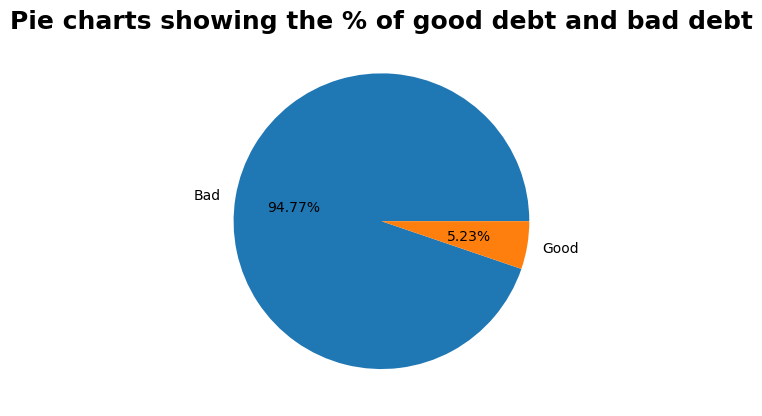

In [36]:
plt.pie(x=train1['Good_Debt'].value_counts().values,labels=['Bad','Good'],autopct='%.2f%%')
plt.title('Pie charts showing the % of good debt and bad debt',size=18,fontweight='bold')
plt.show()

## Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities.

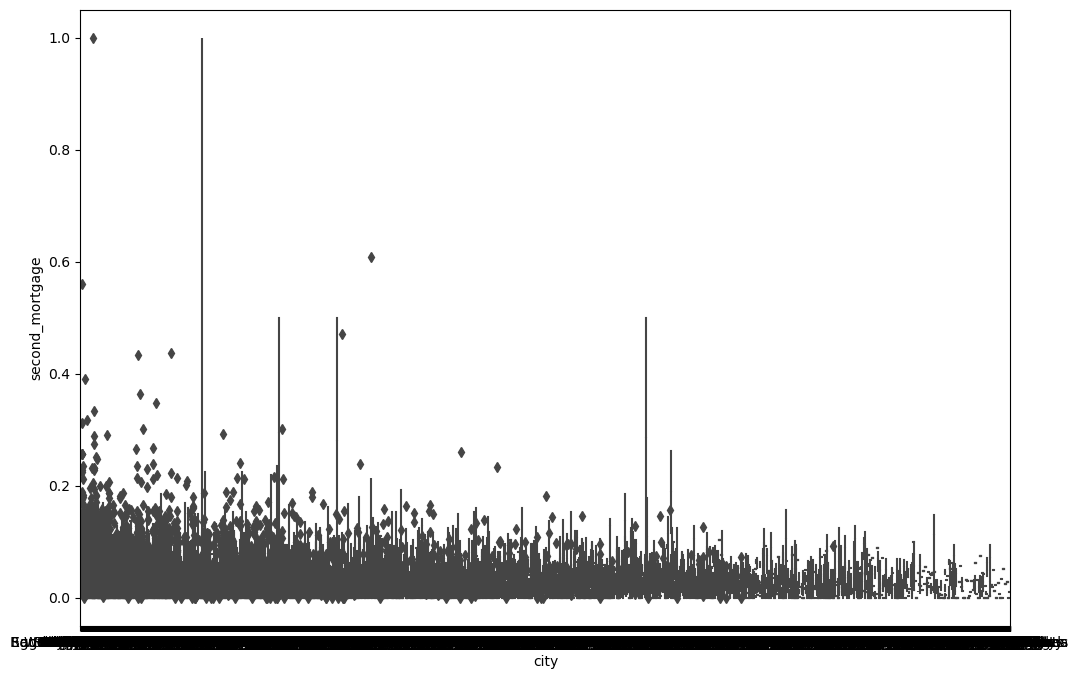

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train1,x='city',y='second_mortgage')
plt.show()

## Create a collated income distribution chart for family income, house hold income and remaining income.

In [38]:
# family_mean,hi_mean,hi_median,hi_stdey,family_median,family_stdey

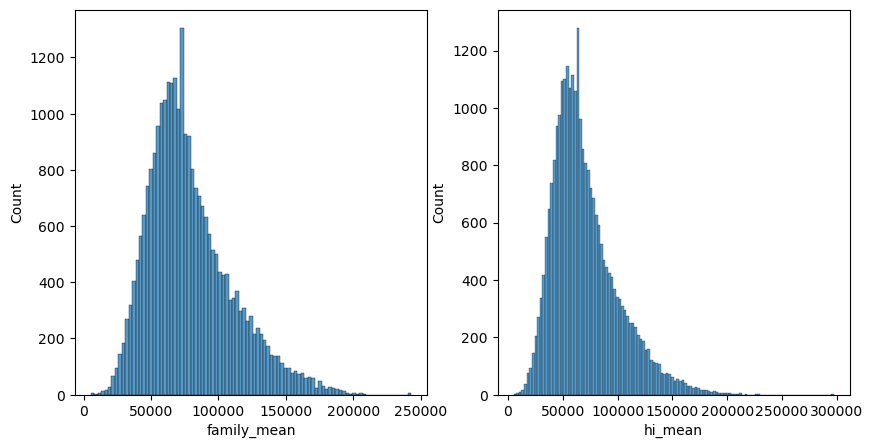

In [39]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(train1['family_mean'],ax=ax[0])
sns.histplot(train1['hi_mean'],ax=ax[1])
plt.show()

In [40]:
# Remaining Income

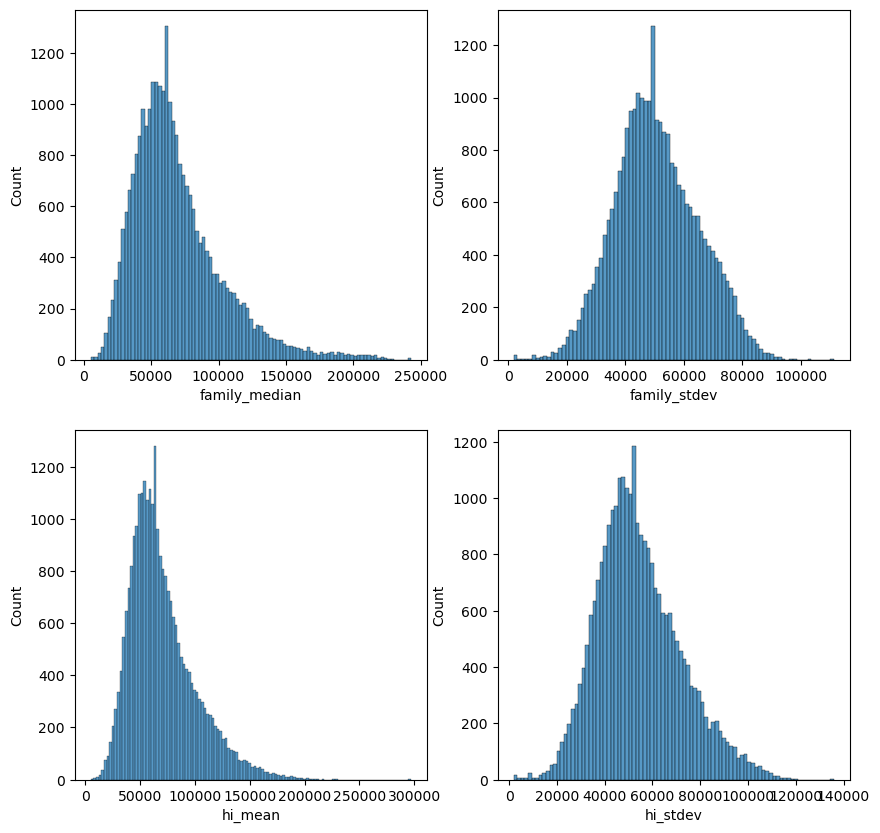

In [41]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.histplot(train1['family_median'],ax=ax[0][0])
sns.histplot(train1['family_stdev'],ax=ax[0][1])
sns.histplot(train1['hi_mean'],ax=ax[1][0])
sns.histplot(train1['hi_stdev'],ax=ax[1][1])
plt.show()

# Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements)

## Population density (hint-use ‘pop’ and ‘Aland’ to calculate)
## median age (hint-use the variables ‘male_age_median’, ‘female_age_median’,‘male_pop’, ‘female_pop’)
## Visualize the findings using appropriate chart type.

In [42]:
train1['population_density']=train1['pop']/train1['ALand']

In [43]:
state_df=train1.groupby('state').mean()

In [44]:
state_df['population_density']=state_df['pop']/state_df['ALand']

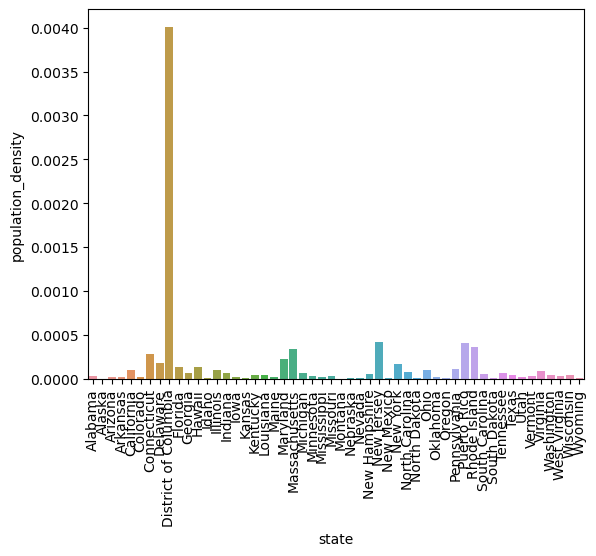

In [45]:
sns.barplot(x=state_df.index,y=state_df['population_density'])
plt.xticks(rotation=90)
plt.show()

In [46]:
total_male_pop=train1['male_pop'].sum()

In [47]:
total_female_pop=train1['female_pop'].sum()

In [48]:
np.median(np.concatenate([np.repeat(train1['male_age_median'],train1['male_pop']),np.repeat(train1['female_age_median'],train1['female_pop'])]))

38.5

In [49]:
train1['male_age_median']

0        44.00000
1        32.00000
2        40.83333
3        48.91667
4        22.41667
           ...   
27316    41.66667
27317    38.83333
27318    42.00000
27319    46.66667
27320    32.50000
Name: male_age_median, Length: 27321, dtype: float64

In [50]:
np.repeat(train1['male_age_median'],train1['male_pop'])

0        44.0
0        44.0
0        44.0
0        44.0
0        44.0
         ... 
27320    32.5
27320    32.5
27320    32.5
27320    32.5
27320    32.5
Name: male_age_median, Length: 58027750, dtype: float64

In [51]:
np.median([train1['male_age_median'],train1['female_age_median']])

39.16667

In [52]:
train1[train1['state']=='Texas']

UID  SUMLEVEL  COUNTYID  STATEID  state state_ab           city  \
6      286689       140       337       48  Texas       TX         Nocona   
14     284565       140       121       48  Texas       TX     Lewisville   
20     285990       140       209       48  Texas       TX     San Marcos   
38     283137       140        29       48  Texas       TX    San Antonio   
58     284589       140       121       48  Texas       TX   Flower Mound   
...       ...       ...       ...      ...    ...      ...            ...   
27283  284293       140       113       48  Texas       TX  Grand Prairie   
27311  287821       140       453       48  Texas       TX         Austin   
27312  283346       140        29       48  Texas       TX    San Antonio   
27314  284644       140       135       48  Texas       TX         Odessa   
27319  287425       140       439       48  Texas       TX    Colleyville   

                    place  type primary  ...  female_age_sample_weight  \
6             Nocona City  Town   tract  ...                 240.99337   
14                 Hebron  Town   tract  ...                 215.98221   
20        San Marcos City  Town   tract  ...                 610.67432   
38             Kirby City  Town   tract  ...                 618.03212   
58           Flower Mound  Town   tract  ...                 415.32234   
...                   ...   ...     ...  ...                       ...   
27283  Grand Prairie City  Town   tract  ...                 595.07298   
27311        Wells Branch  Town   tract  ...                 601.12254   
27312        Helotes City  Town   tract  ...                 431.51879   
27314         Odessa City  Town   tract  ...                 535.23825   
27319    Colleyville City  Town   tract  ...                1373.94120   

       female_age_samples  pct_own  married  married_snp  separated  divorced  \
6                   953.0  0.77658  0.63974      0.01410    0.01410   0.09744   
14                  969.0  0.91137  0.61755      0.04009    0.04009   0.17010   
20                 1427.0  0.25116  0.20499      0.00357    0.00267   0.10339   
38                 2079.0  0.73807  0.56547      0.04748    0.04748   0.09065   
58                 1658.0  0.91764  0.69702      0.04285    0.00000   0.01989   
...                   ...      ...      ...          ...        ...       ...   
27283              2563.0  0.89632  0.54770      0.05300    0.01212   0.12771   
27311              2686.0  0.38655  0.38610      0.01511    0.01511   0.10389   
27312              1717.0  0.64463  0.48426      0.04823    0.03081   0.07435   
27314              2323.0  0.74021  0.56179      0.06260    0.02776   0.18944   
27319              5815.0  0.93970  0.75503      0.02287    0.00915   0.05261   

       Bad_Debt  Good_Debt  population_density  
6       0.00000       True            0.000003  
14      0.19258      False            0.000637  
20      0.00000       True            0.001671  
38      0.01838      False            0.001708  
58      0.09836      False            0.002296  
...         ...        ...                 ...  
27283   0.02945      False            0.001275  
27311   0.02996      False            0.001684  
27312   0.14400      False            0.001163  
27314   0.03961      False            0.001792  
27319   0.14305      False            0.000619  

[1948 rows x 82 columns]

In [53]:
train1[train1['city']=='Chicago']['pop']

99       1460
221      3769
227      1621
257      1827
795      3766
         ... 
26724    2304
26792    1442
26860    7442
27120    1335
27183    1454
Name: pop, Length: 294, dtype: int64

In [54]:
train1[train1['place']=='Glendale City']

UID  SUMLEVEL  COUNTYID  STATEID       state state_ab         city  \
840    225450       140        37        6  California       CA  Los Angeles   
1407   222842       140        13        4     Arizona       AZ      Phoenix   
1500   232053       140         5        8    Colorado       CO       Denver   
1534   222948       140        13        4     Arizona       AZ      Phoenix   
2248   222644       140        13        4     Arizona       AZ     Glendale   
...       ...       ...       ...      ...         ...      ...          ...   
25574  226089       140        37        6  California       CA     Glendale   
26555  222652       140        13        4     Arizona       AZ     Glendale   
26763  222843       140        13        4     Arizona       AZ      Phoenix   
27134  225458       140        37        6  California       CA  Los Angeles   
27166  232370       140        31        8    Colorado       CO       Denver   

               place  type primary  ...  female_age_sample_weight  \
840    Glendale City  City   tract  ...                 397.25535   
1407   Glendale City   CDP   tract  ...                 548.63357   
1500   Glendale City  City   tract  ...                 304.94668   
1534   Glendale City   CDP   tract  ...                 829.34113   
2248   Glendale City   CDP   tract  ...                 395.32708   
...              ...   ...     ...  ...                       ...   
25574  Glendale City  City   tract  ...                 473.62071   
26555  Glendale City   CDP   tract  ...                 743.55950   
26763  Glendale City   CDP   tract  ...                 580.65130   
27134  Glendale City  City   tract  ...                 348.16561   
27166  Glendale City  City   tract  ...                 418.63948   

       female_age_samples  pct_own  married  married_snp  separated  divorced  \
840                1505.0  0.26909  0.31518      0.06518    0.02454   0.10123   
1407               2038.0  0.57300  0.50282      0.05141    0.01901   0.00845   
1500               1277.0  0.01155  0.25262      0.03713    0.03713   0.09040   
1534               3199.0  0.40675  0.39862      0.06988    0.00640   0.14911   
2248               1674.0  0.72951  0.54264      0.08950    0.01198   0.11205   
...                   ...      ...      ...          ...        ...       ...   
25574              2025.0  0.16344  0.52863      0.11241    0.02227   0.04719   
26555              2699.0  0.29523  0.34788      0.04712    0.00116   0.12565   
26763              2161.0  0.53073  0.34157      0.02409    0.01915   0.06733   
27134              1615.0  0.43025  0.42101      0.01910    0.01763   0.08597   
27166              1744.0  0.84594  0.64286      0.00000    0.00000   0.06718   

       Bad_Debt  Good_Debt  population_density  
840     0.14286      False            0.002669  
1407    0.00000       True            0.002765  
1500    0.00000       True            0.002011  
1534    0.11229      False            0.003055  
2248    0.05507      False            0.002952  
...         ...        ...                 ...  
25574   0.06985      False            0.006222  
26555   0.00272      False            0.004158  
26763   0.03003      False            0.003812  
27134   0.09641      False            0.002697  
27166   0.19651      False            0.001893  

[83 rows x 82 columns]

## Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis.
- Analyze the married, separated and divorced population for these population brackets.
- Visualize using appropriate chart type.

In [55]:
train1['population_bins']=pd.cut(train1['pop'],bins=5,labels=['Low','Medium-Low','Medium','Medium-High','High'])

### Analyse the maritial status for population brackets

In [56]:
marital_status_brackets=train1.groupby('population_bins')['married','separated','divorced'].sum()

C:\Users\rajal\AppData\Local\Temp\ipykernel_14112\3094972260.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [57]:
marital_status_brackets

married  separated     divorced
population_bins                                      
Low              13736.732575  516.44618  2718.467595
Medium-Low         143.883850    3.89480    18.535600
Medium               5.901630    0.04503     0.593340
Medium-High          3.523510    0.05699     0.273210
High                 0.734740    0.00405     0.030360

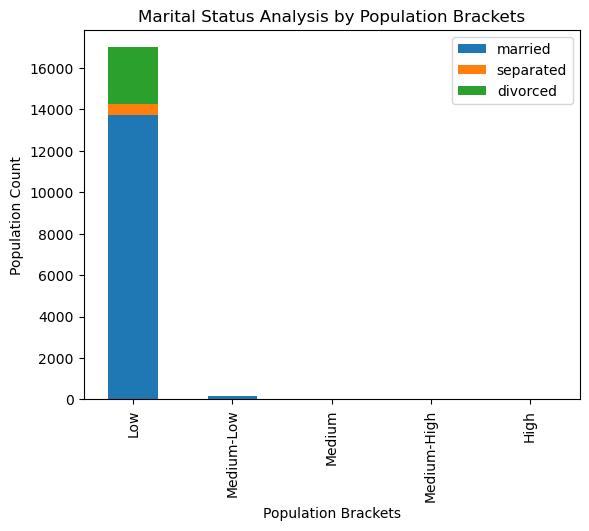

In [58]:
# Visualize material status using a bar chart
marital_status_brackets.plot(kind='bar',stacked=True)
plt.xlabel('Population Brackets')
plt.ylabel('Population Count')
plt.title('Marital Status Analysis by Population Brackets')
plt.show()

## Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [59]:
# Calculate rent as a percentage of income
train1['rent_income_percentage']=(train1['rent_mean']/train1['hi_mean'])*100

In [60]:
# Overall alanysis
overall_rent_percentage=train1['rent_income_percentage'].mean()

In [61]:
# Analysis by states
rent_percentage_by_state=train1.groupby('state')['rent_income_percentage'].mean()

In [62]:
# Print the results
print(f'Overall Rent as Percentage of Income:{overall_rent_percentage:.2f}%')
print('\nRent as Percentage of Income by State.')

Overall Rent as Percentage of Income:1.59%

Rent as Percentage of Income by State.


##  Perform correlation analysis for all the relevant variables by creating a heatmap.Describe your findings.

In [63]:
train1['hi_mean']

0         63125.28406
1         41931.92593
2         84942.68317
3         48733.67116
4         31834.15466
             ...     
27316     18515.67021
27317    119889.08320
27318     79890.25113
27319    165510.27110
27320     51648.18703
Name: hi_mean, Length: 27321, dtype: float64

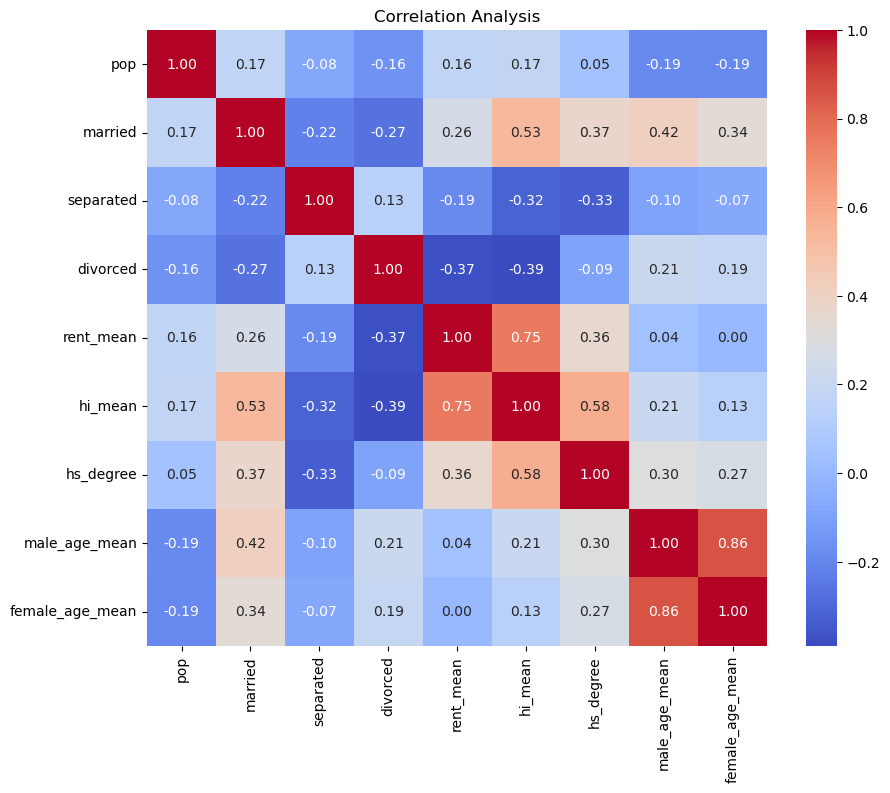

                      pop   married  separated  divorced  rent_mean   hi_mean  \
pop              1.000000  0.165773  -0.079384 -0.159490   0.164866  0.170411   
married          0.165773  1.000000  -0.219870 -0.267903   0.257172  0.532285   
separated       -0.079384 -0.219870   1.000000  0.133399  -0.187838 -0.316322   
divorced        -0.159490 -0.267903   0.133399  1.000000  -0.373903 -0.389753   
rent_mean        0.164866  0.257172  -0.187838 -0.373903   1.000000  0.753641   
hi_mean          0.170411  0.532285  -0.316322 -0.389753   0.753641  1.000000   
hs_degree        0.045483  0.370545  -0.333738 -0.093316   0.362901  0.580024   
male_age_mean   -0.187894  0.415508  -0.095024  0.208635   0.043441  0.205319   
female_age_mean -0.192145  0.335864  -0.071427  0.190627   0.003399  0.133396   

                 hs_degree  male_age_mean  female_age_mean  
pop               0.045483      -0.187894        -0.192145  
married           0.370545       0.415508         0.335864  
separa

In [64]:
# Select relevant variables for correlation analysis
relevant_columns=['pop','married','separated','divorced','rent_mean','hi_mean','hs_degree','male_age_mean','female_age_mean']

# Calculate correlation matrix
corr=train1[relevant_columns].corr()

# Create a heatmap for correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Analysis')
plt.show()

#Describe findings
print(corr)

## Data Pre-processing:

- 1 The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability,known as "specific variance" because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data.

    - Highschool graduation rates
    - Median population age
    - Second Mortgage Statistics
    - Percent Own
    - Bad Debt Expense

## Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; please refer - ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.
- Note: Exclude loans from prediction model which have NaN values for hc_mortgage_mean. NaN represents not a number/missing values.
- Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.
- Run another model at State level. There are 52 states in USA.
- (Considerations: Keep below considerations while building a linear regression model).
- Variables should have significant impact on predicting Monthly mortgage and owner costs.
- Utilize all predictor variable to start with initial hypothesis.
- R square of 60% and above should be achieved.
- Ensure Multi-collinearity does not exist in dependent variables.
- Test if predicted variable is normally distributed.

In [65]:
obj_columns=train1.select_dtypes('O').columns

In [66]:
obj_columns

Index(['state', 'state_ab', 'city', 'place', 'type', 'primary'], dtype='object')

In [67]:
train2=train1.copy()

In [68]:
for col in obj_columns:
    le=LabelEncoder()
    train2[col]=le.fit_transform(train2[col])

In [69]:
train2['Good_Debt']=train2['Good_Debt'].replace({True:1,False:0})

In [70]:
train2=pd.get_dummies(train2)

In [72]:
corr=train2.corr()

In [73]:
corr_value=corr['hc_mortgage_mean'].sort_values(ascending=False)

In [74]:
corr_value.sort_values(ascending=False)

hc_mortgage_mean      1.000000
hc_mortgage_median    0.987404
hc_mortgage_stdev     0.798082
hc_mean               0.794963
hi_stdev              0.773011
                        ...   
divorced             -0.401038
debt_cdf             -0.411089
home_equity_cdf      -0.475023
SUMLEVEL                   NaN
primary                    NaN
Name: hc_mortgage_mean, Length: 88, dtype: float64

In [75]:
positive_corr=list(corr_value[corr_value>0.5].index)

In [76]:
negative_corr=list(corr_value[corr_value<-0.2].sort_values().index)

In [77]:
selected_df=train2[positive_corr+negative_corr]

In [78]:
X=selected_df.drop('hc_mortgage_mean',axis=1)
y=selected_df[['hc_mortgage_mean']]

In [79]:
scaler=StandardScaler()

In [80]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [82]:
model1=LinearRegression()

In [83]:
model1.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred=model1.predict(X_test)

In [85]:
r2_score(y_test,y_pred)

0.9877937625947821